<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import threading
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
data = pd.read_csv("/content/Groceries_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
data['Quantity'] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
transactions = data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index('Member_number')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3895,4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3896,4999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [8]:
transactions = transactions.drop(columns = 'Member_number')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
transactions.fillna(0,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
transactions.astype("int")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,1,0


In [19]:
def encode(x):
  if x<=0:
    return 0
  elif x>=0:
    return 1
encoded = transactions.applymap(encode)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
apriori1 = threading.Event()
fpgrowth1 = threading.Event()

In [41]:
execution_time = [0,0]

In [42]:
minimum_support = float(input("Set the minimum support"))

Set the minimum support0.02


In [52]:
def apriorirun():
  stime = time.time()
  apresults = apriori(encoded,min_support = minimum_support, use_colnames=True)
  execution_time[0] = time.time() - stime
  apriori1.set()
  return apresults

In [51]:
apresults

0

In [53]:
rulesap = association_rules(apriorirun(), metric='lift',min_threshold=1)

In [54]:
rulesap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801
1,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960,0.230217
2,(other vegetables),(UHT-milk),0.376603,0.078502,0.038994,0.103542,1.318979,0.009430,1.027933,0.387936
3,(UHT-milk),(other vegetables),0.078502,0.376603,0.038994,0.496732,1.318979,0.009430,1.238697,0.262440
4,(rolls/buns),(UHT-milk),0.349666,0.078502,0.031042,0.088775,1.130863,0.003592,1.011274,0.177939
...,...,...,...,...,...,...,...,...,...,...
2951,"(yogurt, rolls/buns)","(soda, whole milk)",0.111339,0.151103,0.024628,0.221198,1.463889,0.007804,1.090004,0.356590
2952,(soda),"(whole milk, yogurt, rolls/buns)",0.313494,0.065931,0.024628,0.078560,1.191540,0.003959,1.013705,0.234157
2953,(whole milk),"(soda, yogurt, rolls/buns)",0.458184,0.042329,0.024628,0.053751,1.269836,0.005233,1.012071,0.392193
2954,(yogurt),"(soda, whole milk, rolls/buns)",0.282966,0.065162,0.024628,0.087035,1.335684,0.006190,1.023959,0.350499


In [56]:
def fpgrowthrun():
  stime = time.time()
  fpresults = fpgrowth(encoded,min_support=minimum_support,use_colnames=True)
  execution_time[1] = time.time() - stime
  fpgrowth1.set()
  return fpresults

In [57]:
rulesfp = association_rules(fpgrowthrun(),metric="lift",min_threshold=1)

In [58]:
rulesfp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
1,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
2,(soda),(rolls/buns),0.313494,0.349666,0.119805,0.382160,1.092928,0.010187,1.052593,0.123855
3,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,0.010187,1.044316,0.130743
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237,0.071601
...,...,...,...,...,...,...,...,...,...,...
2951,(cat food),(other vegetables),0.043869,0.376603,0.024115,0.549708,1.459646,0.007594,1.384426,0.329351
2952,(whole milk),(chewing gum),0.458184,0.044638,0.025654,0.055991,1.254328,0.005202,1.012026,0.374223
2953,(chewing gum),(whole milk),0.044638,0.458184,0.025654,0.574713,1.254328,0.005202,1.274001,0.212234
2954,(other vegetables),(chewing gum),0.376603,0.044638,0.020523,0.054496,1.220834,0.003712,1.010426,0.290165


In [45]:
apithread=threading.Thread(target=apriorirun)
fpthread=threading.Thread(target=fpgrowthrun)

In [46]:
apithread.start()
fpthread.start()
apriori1.wait()
fpgrowth1.wait()
apithread.join()
fpthread.join()

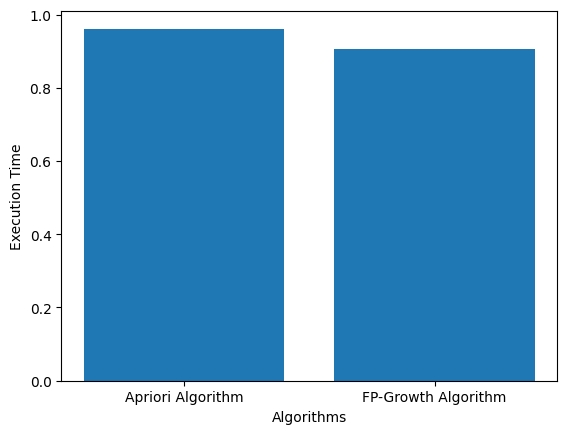

In [47]:
algorithms = ['Apriori Algorithm','FP-Growth Algorithm']
plt.bar(algorithms,execution_time)
plt.xlabel("Algorithms")
plt.ylabel("Execution Time")
plt.show()


In [48]:
if execution_time[0] > execution_time[1]:
  print("FP-Growth Algorithm is faster")
else:
  print("Apriori Algorithm is faster")

FP-Growth Algorithm is faster
